# Imports

In [2]:
## Importing needed packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import csv



In [60]:
run functions/_functions_Maps.ipynb

# Accessing the file and plotting hydrographs

In [46]:
file_path = './Simulation_outputs/discharge_daily.tss'

# Define lists to store timestamps and values
timestamps = []
discharge1 = []  
discharge2 = [] 

# Open the file and read its contents
with open(file_path, 'r') as file:
    # Skip first lines until we reach the data
    for line in file:
        if line.strip().isdigit():
            break
    
    # Process the remaining lines containing data
    for line in file:
        # Split the line by whitespace
        parts = line.split()
        if len(parts) == 3:  # Assuming timestamp and two values
            timestamp = int(parts[0])
            value1 = float(parts[1])
            value2 = float(parts[2])
            
            # Append data to lists
            timestamps.append(timestamp)
            discharge1.append(value1)
            discharge2.append(value2)

# # # Print the extracted data
# for i in range(len(timestamps)):
#     print(f"Timestamp: {timestamps[i]}, Value1: {discharge1[i]}, Value2: {discharge2[i]}")


In [43]:
# Normalize timestamp to start from 0
## 0 means 1/1/2000

first_timestamp = timestamps[0]

for i in range(len(timestamps)):
    timestamps[i] = timestamps[i] - first_timestamp

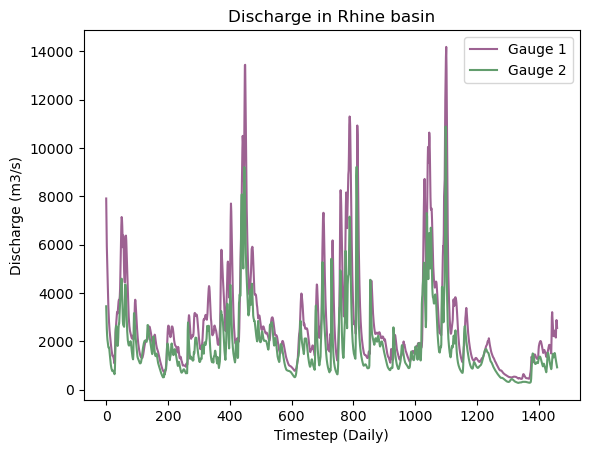

In [44]:
# Plotting

plt.plot(timestamps, discharge1, label='Gauge 1', color='#9D6292') # 6.25 51.75
plt.plot(timestamps, discharge2, label='Gauge 2', color='#629D6D') # 7.75 49.75
plt.title('Discharge in Rhine basin')
plt.ylabel('Discharge (m3/s)')
plt.xlabel('Timestep (Daily)')
plt.legend()
plt.show()
plt.savefig('Discharge in Rhine Basin.png', dpi=300)
plt.close()

In [45]:
# Plotting

plt.plot(timestamps, discharge1, label='Gauge 1', color='#9D6292') # 6.25 51.75
plt.plot(timestamps, discharge2, label='Gauge 2', color='#629D6D') # 7.75 49.75
plt.title('Discharge in Rhine basin')
plt.ylabel('Discharge (m3/s)')
plt.xlabel('Timestep (Daily)')
plt.legend()
plt.savefig('Discharge in Rhine Basin.png', dpi=300)
plt.close()

# TotalET & Runoff maps

In [73]:
output_folder = './Simulation_outputs'

totalET_nc = './Simulation_outputs/totalET_annualavg.nc'
runoff_nc = './Simulation_outputs/runoff_daily.nc'

totalET = xr.open_dataset(totalET_nc, decode_times=False)
runoff = xr.open_dataset(runoff_nc, decode_times=False)

In [74]:
time_var = [2000, 2001, 2002, 2003]

# Update the time variable in the dataset
totalET['time'] = time_var

totalET # Units [m]

<xarray.Dataset>
Dimensions:            (lon: 14, lat: 12, time: 4)
Coordinates:
  * lon                (lon) float64 5.25 5.75 6.25 6.75 ... 10.75 11.25 11.75
  * lat                (lat) float64 51.75 51.25 50.75 ... 47.25 46.75 46.25
  * time               (time) int32 2000 2001 2002 2003
Data variables:
    totalET_annualavg  (time, lat, lon) float32 ...
Attributes:
    settingsfile:     D:\CWatM\CWatM-Abi\Tutorials\1_Turn-ON\settings_Rhine-3...
    run_created:      Tue Mar 12 14:35:29 2024
    Source_Software:  CWATM Python: D:\CWatM\CWatM-Abi\cwatm\run_cwatm.py
    Platform:         Windows
    Version:          1.5: __init__.py 2023/04/13 15:12
    institution:      IIASA
    title:            Rhine Water Model - WATCH WDFEI
    source:           CWATM output maps
    Conventions:      CF-1.6
    description:      Total evapotranspiration for each cell including all la...
    author:           IIASA WAT

runoff
Showing the sum of runoff over the simulation period.
number of days 1461


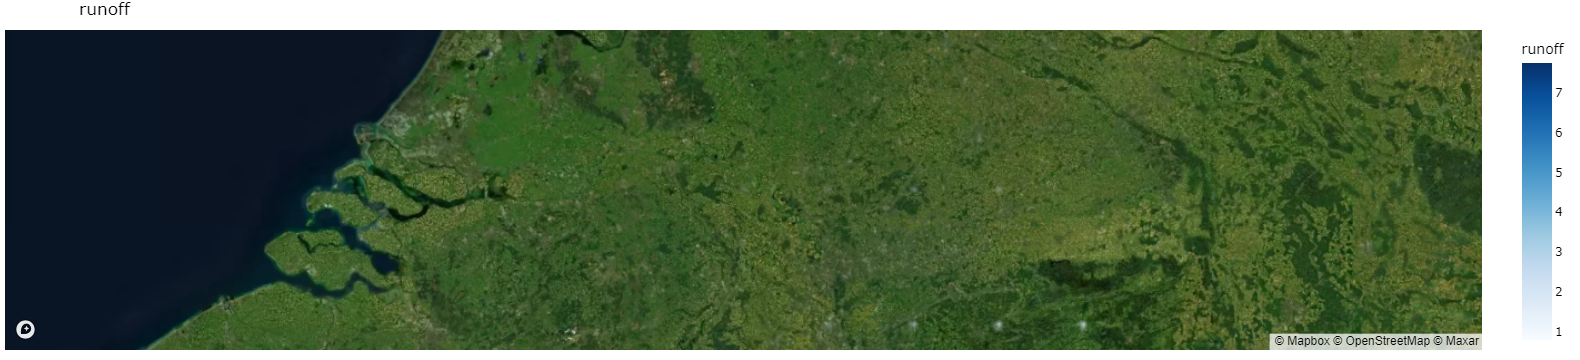

In [75]:
display_map('runoff', day=-1, Rad=7, daySum=True, latitude=51.75, longitude=6.25, colourScale ='Blues', dark=False, outputFolder = output_folder)